<a href="https://colab.research.google.com/github/ddoddii/Mycolab/blob/master/%ED%95%A0%EC%88%98%EC%9E%88%EC%A1%B0_HW2_PCA%26FA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Research Question


2주차 실습과제의 Research Question은 다음과 같다.
1. 현재 데이터셋은 차원축소가 필요한 데이터셋인가
2. feature들은 몇개의 PC로 축소되어야 하는가
3. feature들에서 몇개의 Factor들이 추출되는가

위 3개의 질문들을 답하면서 PCA와 FA분석에 대해 배울 수 있었다.

# 적절성

**선정이유 및 배경**

채무불이행 가능성을 파악하는 것은 신용카드 회사에게 있어서 매우 중요한 요소이다. 한 예로 2002년 신용카드 대출을 무분별하게 승인해주었다가 750만명에 가까운 신용불량자가 발생하여 정부에서는 특별사면을 해주어야 했으며 은행은 대출금과 이자에 대한 손실을 입게 되었다. 

따라서 무분별한 신용대출과 신용불량자 방지를 위해 신용대출을 이행할 수 있는지 여부를 파악하고자 UCI  Machine Learning Repository의 'default of credit card clients data'를 사용하여 실습을 진행하였다. 

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

target변수인 default를 제외하고 변수가 23개로 많고 변수들간의 상관관계가 높아 다중공선성 문제가 발생할 수 있으므로 차원축소를 진행하고자 한다.
진행할 PCA분석과 FA분석의 경우 수치형 변수가 많은 데이터셋이 필요하므로 이 데이터셋을 선정했다.

차원축소를 통해 다중 공선성 문제를 해결하고 시각적으로 데이터를 압축해서 표현하여 해석해보고자 한다.

# Data 불러오기

공유 드라이브에 마운트한 뒤 저장된 데이터셋을 불러왔다.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#xlrd version 오류날 경우
# !pip install --upgrade xlrd
# !pip install --upgrade pandas

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/Shareddrives/데마 팀플/할수있조_HW2/default_credit_card.csv')   #데이터셋 불러오기
credit_data = df.drop("ID",axis=1)        #불필요한 변수 제거
print(credit_data)

       LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0          20000    2          2         1   24      2      2     -1     -1   
1         120000    2          2         2   26     -1      2      0      0   
2          90000    2          2         2   34      0      0      0      0   
3          50000    2          2         1   37      0      0      0      0   
4          50000    1          2         1   57     -1      0     -1      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
29995     220000    1          3         1   39      0      0      0      0   
29996     150000    1          3         2   43     -1     -1     -1     -1   
29997      30000    1          2         2   37      4      3      2     -1   
29998      80000    1          3         1   41      1     -1      0      0   
29999      50000    1          2         1   46      0      0      0      0   

       PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6 

In [ ]:
!pip install factor_analyzer # https://pypi.org/project/factor-analyzer/

     |████████████████████████████████| 41 kB 474 kB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41455 sha256=98081329f070fa2dff726fa9244fe3e7ade024089be4d69c775a2cadb5a35d78
  Stored in directory: /root/.cache/pip/wheels/ac/00/37/1f0e8a5039f9e9f207c4405bbce0796f07701eb377bfc6cc76
Successfully built factor-analyzer


In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA

# 필요한 패키지/모듈 가져오기
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

from factor_analyzer import FactorAnalyzer

# 데이터셋 설명 및 전처리

Attribute Information:

This research employed a binary variable, default: 채무불이행 여부 default payment (Yes = 1 , No = 0 ), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:

LIMIT_BAL: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

SEX: Gender (1 = male; 2 = female).

EDUCATION: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

MARRIAGE: Marital status (1 = married; 2 = single; 3 = others).

Age: Age (year).

PAY_1 - PAY_5: 상환 상황 History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: PAY_1 = the repayment status in September, 2005; PAY_2 = the repayment status in August, 2005; . . .;PAY_6 = the repayment status in April, 2005. 

The measurement scale for the repayment status is: -2: No consumption, -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

BILL_AMT1-BILL_AMT6: 청구명세서 액수 Amount of bill statement (NT dollar). BILL_AMT1 = amount of bill statement in September, 2005; BILL_AMT2 = amount of bill statement in August, 2005; . . .; BILL_AMT6 = amount of bill statement in April, 2005.

PAY_AMT1-PAY_AMT6: 이전 지불 금액 Amount of previous payment (NT dollar). PAY_AMT1 = amount paid in September, 2005; PAY_AMT2 = amount paid in August, 2005; . . .;PAY_AMT6 = amount paid in April, 2005.

target인 'default'를 제외하면 총 23개의 feature들이 있다.
이 때 범주형 변수인 'SEX', 'EDUCATION', 'MARRIAGE'는 목적에 적합하지 않으므로 제거하고 20개의 feature들만 가지고 작업을 진행하기로 했다.

In [ ]:
credit_data.head(3)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [ ]:
y_target = credit_data['default']
x_features = credit_data.drop(['default','SEX','EDUCATION','MARRIAGE'], axis=1)
#원활한 PCA와 FA 진행을 위해 양적변수들이 아닌 SEX, EDUCATION, MARRIAGE를 제외한다.

In [ ]:
x_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   AGE        30000 non-null  int64
 2   PAY_1      30000 non-null  int64
 3   PAY_2      30000 non-null  int64
 4   PAY_3      30000 non-null  int64
 5   PAY_4      30000 non-null  int64
 6   PAY_5      30000 non-null  int64
 7   PAY_6      30000 non-null  int64
 8   BILL_AMT1  30000 non-null  int64
 9   BILL_AMT2  30000 non-null  int64
 10  BILL_AMT3  30000 non-null  int64
 11  BILL_AMT4  30000 non-null  int64
 12  BILL_AMT5  30000 non-null  int64
 13  BILL_AMT6  30000 non-null  int64
 14  PAY_AMT1   30000 non-null  int64
 15  PAY_AMT2   30000 non-null  int64
 16  PAY_AMT3   30000 non-null  int64
 17  PAY_AMT4   30000 non-null  int64
 18  PAY_AMT5   30000 non-null  int64
 19  PAY_AMT6   30000 non-null  int64
dtypes: int64(20)
memory usage: 4.6 MB


20개의 feature들에 대해 서로의 상관계수를 구해보았다. 그 결과 PAY_1 ~ PAY_6 과 BILL_AMT1 ~ BILL_AMT6 이 각각 높은 상관관계를 보여주는 것에 주목할 수 있다. 이는 모델링에 있어 다중공선성이란 문제를 일으킬 수 있다. 따라서 배웠던 PCA나 FA를 통해 차원 축소 작업을 거쳐야 한다.

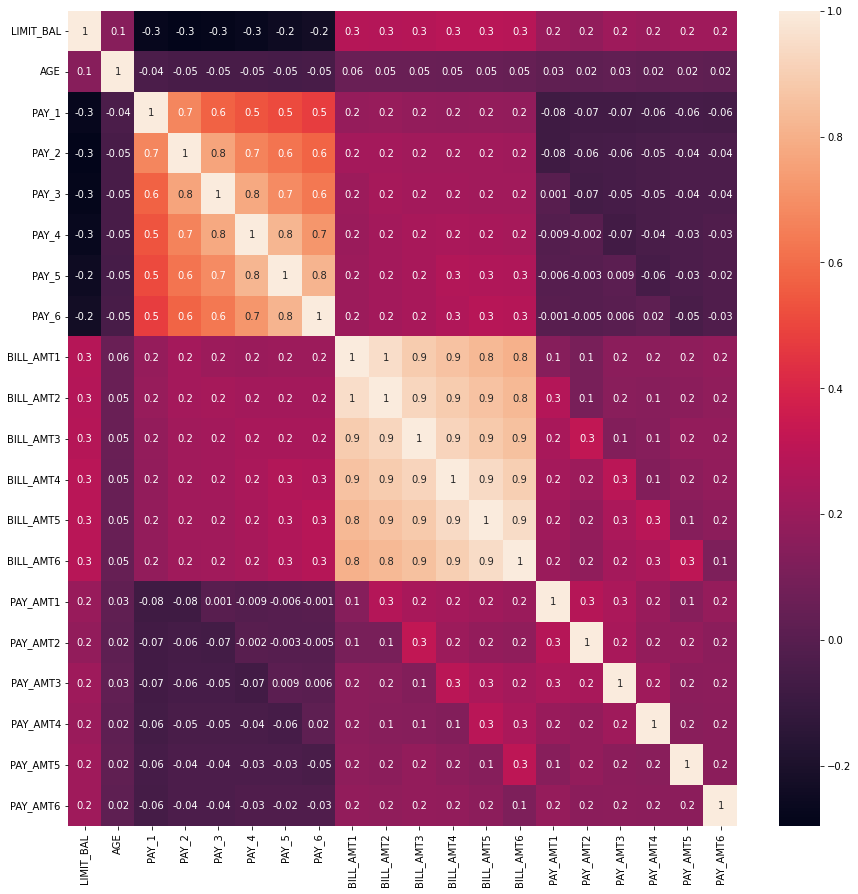

In [ ]:
corr = x_features.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, fmt='.1g')

각 feature의 스케일에 따라 설명가능한 분산이 왜곡될 가능성이 생기므로 Scaling작업을 해주어야한다. 이때 feature들의 평균이 0이 되는 것이 편하므로 StandardScaler를 사용한다.

In [ ]:
# 열별로 scaling (z-standardization)
from sklearn.preprocessing import StandardScaler
data_scale = pd.DataFrame(StandardScaler().fit_transform(x_features), columns=x_features.columns, index = x_features.index)

In [ ]:
data_scale

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-1.136720,-1.246020,1.794564,1.782348,-0.696663,-0.666599,-1.530046,-1.486041,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382
1,-0.365981,-1.029047,-0.874991,1.782348,0.138865,0.188746,0.234917,1.992316,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878
2,-0.597202,-0.161156,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122
3,-0.905498,0.164303,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130
4,-0.905498,2.334029,-0.874991,0.111736,-0.696663,0.188746,0.234917,0.253137,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.404759,0.381275,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,1.870379,2.018136,2.326690,0.695474,-0.149259,-0.384392,0.171250,0.611048,-0.012648,-0.113564,0.013131,-0.237130
29996,-0.134759,0.815221,-0.874991,-0.723570,-0.696663,-0.666599,0.234917,0.253137,-0.672786,-0.665299,-0.627430,-0.532924,-0.577691,-0.652724,-0.231032,-0.103955,0.214255,-0.299828,-0.314136,-0.293382
29997,-1.059646,0.164303,3.574267,2.617654,1.809921,-0.666599,0.234917,0.253137,-0.647227,-0.643830,-0.638158,-0.347961,-0.324517,-0.327687,-0.341942,-0.256990,0.952725,-0.039964,-0.183229,-0.119001
29998,-0.674276,0.598248,0.904712,-0.723570,0.138865,0.188746,0.234917,-0.616452,-0.717982,0.410269,0.422373,0.147844,-0.468063,0.169130,4.844316,-0.109033,-0.229895,-0.185120,3.152536,-0.191904


In [ ]:
data_scale.mean(axis=0).head()

LIMIT_BAL    2.436569e-17
AGE         -7.286024e-17
PAY_1       -7.559566e-17
PAY_2       -1.586202e-15
PAY_3       -1.135055e-16
dtype: float64

In [ ]:
data_scale.cov() # 공분산행렬

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
LIMIT_BAL,1.000033,0.144718,-0.271223,-0.296392,-0.286132,-0.267469,-0.249420,-0.235203,0.285439,0.278324,0.283245,0.293997,0.295572,0.290399,0.195242,0.178414,0.210174,0.203249,0.217210,0.219603
AGE,0.144718,1.000033,-0.039449,-0.050149,-0.053050,-0.049723,-0.053828,-0.048775,0.056240,0.054285,0.053711,0.051355,0.049347,0.047614,0.026148,0.021786,0.029248,0.021380,0.022851,0.019479
PAY_1,-0.271223,-0.039449,1.000033,0.672187,0.574264,0.538859,0.509443,0.474569,0.187075,0.189865,0.179791,0.179131,0.180641,0.176986,-0.079271,-0.070103,-0.070563,-0.064007,-0.058192,-0.058675
PAY_2,-0.296392,-0.050149,0.672187,1.000033,0.766577,0.662089,0.622801,0.575520,0.234894,0.235265,0.224153,0.222244,0.221356,0.219411,-0.080703,-0.058992,-0.055903,-0.046860,-0.037094,-0.036502
PAY_3,-0.286132,-0.053050,0.574264,0.766577,1.000033,0.777385,0.686797,0.632705,0.208480,0.237302,0.227502,0.227210,0.225153,0.222334,0.001295,-0.066796,-0.053313,-0.046068,-0.035864,-0.035862
PAY_4,-0.267469,-0.049723,0.538859,0.662089,0.777385,1.000033,0.819863,0.716473,0.202819,0.225824,0.244991,0.245925,0.242910,0.239162,-0.009362,-0.001944,-0.069238,-0.043463,-0.033591,-0.026566
PAY_5,-0.249420,-0.053828,0.509443,0.622801,0.686797,0.819863,1.000033,0.816927,0.206691,0.226921,0.243343,0.271924,0.269792,0.262518,-0.006089,-0.003191,0.009063,-0.058301,-0.033338,-0.023028
PAY_6,-0.235203,-0.048775,0.474569,0.575520,0.632705,0.716473,0.816927,1.000033,0.207380,0.226932,0.241189,0.266365,0.290903,0.285100,-0.001496,-0.005223,0.005834,0.019018,-0.046435,-0.025300
BILL_AMT1,0.285439,0.056240,0.187075,0.234894,0.208480,0.202819,0.206691,0.207380,1.000033,0.951515,0.892308,0.860301,0.829806,0.802677,0.140282,0.099358,0.156892,0.158308,0.167031,0.179347
BILL_AMT2,0.278324,0.054285,0.189865,0.235265,0.237302,0.225824,0.226921,0.226932,0.951515,1.000033,0.928357,0.892512,0.859807,0.831621,0.280375,0.100854,0.150723,0.147403,0.157963,0.174262


# Principle Component 수 선택

In [ ]:
# PCA 진행
pca = PCA(random_state=325)
X_p = pca.fit_transform(data_scale)

## 방안 1. Eigen value가 1 이상일 때까지

In [ ]:
# Eigen value
fa = FactorAnalyzer(n_factors=data_scale.shape[1], rotation=None) # rotation: 
fa.fit(data_scale)

ev, v = fa.get_eigenvalues()
print('eigen value:', ev,'\n')

print('적합한 PC 개수:', sum(ev >= 1))

eigen value: [6.53831018 4.06216273 1.50877984 1.00283872 0.92291797 0.88812784
 0.87373752 0.78368069 0.73273031 0.70046958 0.59145445 0.40437921
 0.25996392 0.25044652 0.18873128 0.13179337 0.07016856 0.0407853
 0.02529779 0.02322423] 

적합한 PC 개수: 4


## 방안 2. Scree plot 그래프 기울기가 완만해지기 전까지

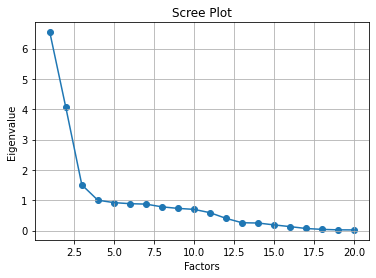

In [ ]:
# 시각화 1
plt.scatter(range(1, data_scale.shape[1]+1),ev)
plt.plot(range(1,data_scale.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Factors가 3->4 이후 4->5부터 기울기가 완만해진다.

기울기가 완만해지기 전의 값을 찾아야하므로 
적합한 PC의 개수는 3개이다.

In [ ]:
# 분산 설명 비율
each_variance_ratio = pca.explained_variance_ratio_
print('분산 설명 비율:\n', each_variance_ratio) # 각 PC별 분산 설명 비율

cumsum = np.cumsum(each_variance_ratio)
print('누적 분산 설명 비율:\n', cumsum) # 고유값을 기준으로 설명 가능한 분산 (누적)

분산 설명 비율:
 [0.32691551 0.20310814 0.07543899 0.05014194 0.0461459  0.04440639
 0.04368688 0.03918403 0.03663652 0.03502348 0.02957272 0.02021896
 0.0129982  0.01252233 0.00943656 0.00658967 0.00350843 0.00203926
 0.00126489 0.00116121]
누적 분산 설명 비율:
 [0.32691551 0.53002365 0.60546264 0.65560457 0.70175047 0.74615686
 0.78984374 0.82902777 0.86566429 0.90068777 0.93026049 0.95047945
 0.96347765 0.97599997 0.98543654 0.99202621 0.99553463 0.9975739
 0.99883879 1.        ]


PC3까지 선택할경우 누적분산 설명비율은 약 60퍼센트이다

PC 4까지 선택할경우 누적분산 설명비율은 약 65퍼센트이다.

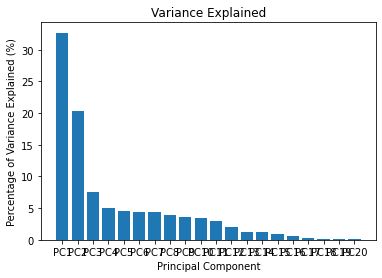

In [ ]:
# 시각화 2
percent_variance = np.round(each_variance_ratio* 100, decimals =2)
columns = []
for i in range(len(percent_variance)):
    columns.append(f'PC{i+1}')

ax = plt.bar(x = range(len(percent_variance)), height=percent_variance, tick_label=columns)
plt.ylabel('Percentage of Variance Explained (%)')
plt.xlabel('Principal Component')
plt.title('Variance Explained')
plt.show()

## 방안 3. 약 80% 이상의 분산을 설명하는 PC 건수 채택

In [ ]:
d = np.argmax(cumsum >= 0.80) +1 #누적된 설명가능한 분산의 비율이 0.85 이상
print('적합한 PC 개수:', d) # 17개 선택 (PC16까지 활용)

적합한 PC 개수: 8


# PCA

방안1에서는 4개의 pc개수를 제안하고 방안2에서는 3개의 pc개수를 제안하며 비슷한 값을 제안하지만

방안 3에서는 8개의 pc개수를 제안하기 때문에 차원축소의 의미를 살려 방안3는 고려하지 않았고 

4개의 pc개수로 누적분산 설명이 좀더 높은 방안1을 선택하였다

In [ ]:
pca = PCA(n_components=4,random_state=324) # n_components를 재설정
X_p = pca.fit_transform(data_scale)

In [ ]:
# 각 PC를 이루는 변수들의 조합 구성 (23X5): Eigen Vector
pca_df=pd.DataFrame(pca.components_.T, 
             columns = ['PC1','PC2','PC3','PC4'], 
             index=x_features.columns)
pca_df

,PC1,PC2,PC3,PC4
LIMIT_BAL,0.069794,0.313392,0.051951,-0.195235
AGE,0.012980,0.067807,-0.034570,-0.965141
PAY_1,0.160257,-0.300696,-0.004479,-0.043907
PAY_2,0.193185,-0.337700,0.044519,-0.044338
PAY_3,0.199322,-0.347142,0.099914,-0.047683
PAY_4,0.206197,-0.348129,0.136897,-0.053802
PAY_5,0.210204,-0.335298,0.155733,-0.043116
PAY_6,0.205778,-0.309527,0.153650,-0.034241
BILL_AMT1,0.334807,0.139864,-0.224318,0.021109
BILL_AMT2,0.346258,0.140084,-0.193903,0.032937


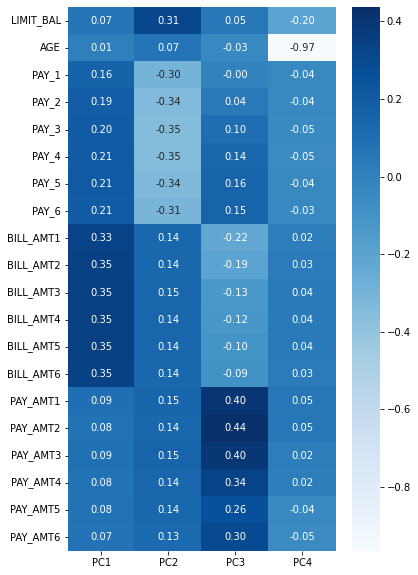

In [ ]:

plt.figure(figsize=(6,10))
sns.heatmap(pca_df, cmap="Blues", annot=True, fmt='.2f')

In [ ]:
np.cumsum(pca.explained_variance_ratio_) #방안 1의 누적설명분산은 약 65퍼센트

array([0.32691551, 0.53002365, 0.60546264, 0.65560452])

In [ ]:
X_pp = pd.DataFrame(X_p, 
                    columns = ['PC1','PC2','PC3','PC4',], 
                    index =x_features.index)

X_pp # PCA 이후 만들어진 data (PC1~ PC4로 총 4개 변수로 축소)

,PC1,PC2,PC3,PC4
0,-1.882545,-0.950517,-0.634975,1.303575
1,-0.750441,-2.091268,0.489480,0.782926
2,-0.831802,-1.043824,0.021476,0.118996
3,-0.191578,-0.863092,-0.328604,-0.051873
4,-0.881238,-0.054429,0.835190,-2.018493
...,...,...,...,...
29995,2.465406,0.812899,-0.796070,-0.225376
29996,-1.826196,0.166505,0.071686,-0.757624
29997,0.322151,-3.238357,0.695157,-0.390893
29998,0.591726,0.853788,2.443829,-0.347108


# PCA 결과해석


* PC1의 경우 BILL_AMT1,BILL_AMT2.., BILL_AMT6 변수들이 높은 
계수를 가지므로  **PC1은 월 별로 나눠져있던 BILL_AMT(청구명세서 액수) 변수들을 하나의 주성분으로 통합**한 것으로 볼 수 있다.

* PC2의 경우 PAY_1,PAY_2.., PAY_6 변수들이 높은 계수를 가지므로 **PC2은 월 별로 나눠져있던 PAY(상환상황) 변수들을 하나의 주성분으로 통합**한 것으로 볼 수 있다.

* PC3은 PAY_AMT1,PAY_AMT2..,PAY_AMT6 변수들이 높은 계수를 가지므로 **PC3는 전에 냈던 돈 (Amount of Money paid) 변수들을 하나의 주성분으로 통합**한 것으로 볼 수 있다.

* PC4는 AGE 변수가 높은 계수를 가지므로 **PC4 는 AGE 변수를 대표하는 주성분**으로 볼 수 있다. 

*   채무불이행을 파악하는데 가장 많은 영향을 주는 변수가 청구명세서 액수 > 상환상황 (밀린 달의 수) > 전에 냈던 돈 > 나이 순으로 나타났다. 



# Plot

## Score Plot

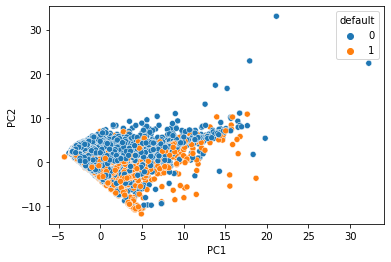

In [ ]:
import seaborn as sns
sns.scatterplot(data=X_pp,x='PC1',y='PC2',hue=y_target)

보라색은 채무불이행자 y=0, 노란색은 채무불이행자 y=1 데이터를 보여준다.

(-20.0, 20.0)

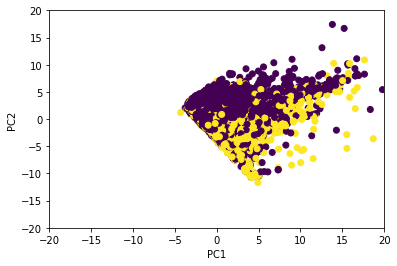

In [ ]:
# PC1과 PC2에 대해서 

plt.scatter(x=X_pp['PC1'],y=X_pp['PC2'], c=y_target)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.xlim(-20,20)
plt.ylim(-20,20)


* PC1청구명세서 액수가 증가할때 PC2 채무상황(연기된 달)이 역시 커지는 모습을 볼 수 있다.
* PC1 청구명세서 금액이 커질수록 채무이행자(보라색)는 채무불이행자(노란색)보다 PC2 상환상황이 더 커짐을 알 수 있다.
* 연기된 달이 적고, 채무상환금액이 클수록 채무 불이행이 됨을 알 수 있다.



(-20.0, 20.0)

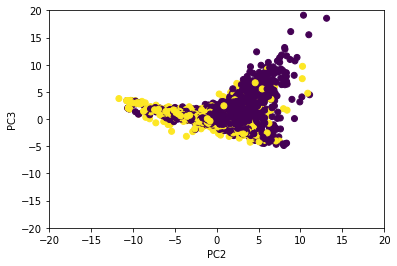

In [ ]:
# PC2과 PC3에 대해서 

plt.scatter(x=X_pp['PC2'],y=X_pp['PC3'], c=y_target)
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.xlim(-20,20)
plt.ylim(-20,20)



*   보라색(채무이행자)의 경우 PC2 채무상황(연기된 달)이 증가할때 PC3는 전에 냈던 돈이 역시 증가하는 모습을 볼 수 있다.
* 반대로 노란색(채무불이행자)의 경우 PC2 채무상황(연기된 달)이 증가할때 PC3는 전에 냈던 돈은 감소하는 것을 볼 수 있다. 
* 채무불이행자는 연기된 달이 적고 전에 냈던 금액이 작은 경향이 있고 채무이행자는 연기된 달이 많고 전에 냈던 금액이 큰 경향이 있다. 




(-5.0, 5.0)

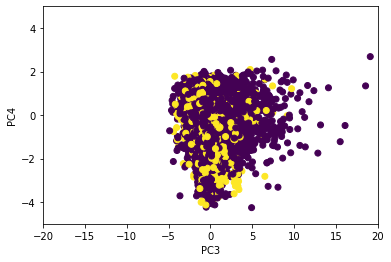

In [ ]:
# PC3과 PC4에 대해서 

plt.scatter(x=X_pp['PC3'],y=X_pp['PC4'], c=y_target)
plt.xlabel('PC3')
plt.ylabel('PC4')
plt.xlim(-20,20)
plt.ylim(-5,5)

*   PC3 전에 냈던 돈과 PC4 나이는 고르게 분포되므로 크게 눈에 띄는 관계가 없는 것으로 파악된다. 하지만 상대적으로 채무불이행자가 나이가 어리고 채무이행자는 나이가 많으것을 볼 수 있다. 
 
* 채무이행자는 전에 냈던 금액이 많을때 채무불이행자는 전에 냈던 금액이 적은 경향이 있다. 

(-20.0, 20.0)

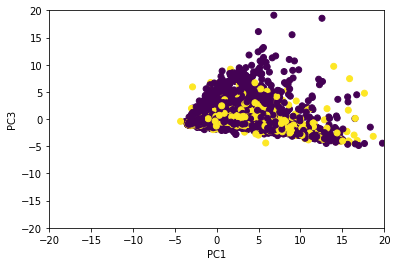

In [ ]:
#PC1과 PC3에 대해서

plt.scatter(x=X_pp['PC1'],y=X_pp['PC3'], c=y_target)
plt.xlabel('PC1')
plt.ylabel('PC3')
plt.xlim(-20,20)
plt.ylim(-20,20)



*   노란색(채무불이행자)의 경우 PC1 청구명세서 금액이 증가할수록 PC3 전에 냈던 금액이 감소하는 모습을 보인다. 
*   보라색(채무이행자)의 경우 PC1 청구명세서 금액과 PC3 전에 냈던 금액 사이에 눈에 띄는 관계는 확인하기 어렵다
* 채무이행자가 전에냈던 금액이 높을때 더 많이 분포함을 알 수 있다. 



(-5.0, 5.0)

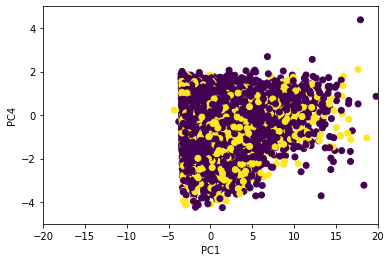

In [ ]:
#PC1과 PC4에 대해서

plt.scatter(x=X_pp['PC1'],y=X_pp['PC4'], c=y_target)
plt.xlabel('PC1')
plt.ylabel('PC4')
plt.xlim(-20,20)
plt.ylim(-5,5)

0을 기점으로 무작위로 점이 찍혀있어 PC1(청구명세서 액수)과 PC4 나이 사이에 상관도가 낮은 것을 알 수 있다.

(-5.0, 5.0)

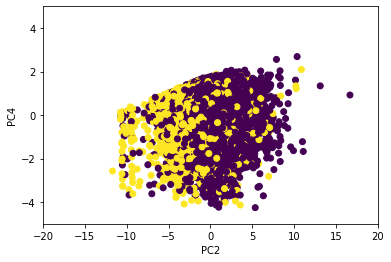

In [ ]:
#PC2 와 PC4에 대해서

plt.scatter(x=X_pp['PC2'],y=X_pp['PC4'], c=y_target)
plt.xlabel('PC2')
plt.ylabel('PC4')
plt.xlim(-20,20)
plt.ylim(-5,5)



*   PC2 연체된 달의 수와 PC4 나이는 0을 주위로 무작위 형태로 점이 찍혀있으므로 상관도가 낮은것을 알 수 있다.
*   PC2 연체된 달의 수가 많을 경우 보라색(채무이행자)가 많고 적을 수록 노란색(채무불이행자)가 많음을 알 수 있다. 




나이의 경우 다른 PC변수들과의 상관도가 낮은 관계로 PC1, PC2, PC3의 경우에 대해서 3d score plot을 작성하였다. 

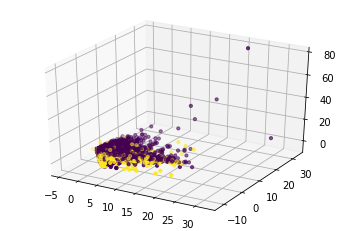

In [ ]:
#PC1,PC2,PC3에 대해서 

fig = plt.figure()
ax = fig.gca(projection = '3d')

ax.scatter(X_pp['PC1'],X_pp['PC2'],X_pp['PC3'], s=10, c = y_target)
plt.show()



*   해당 그래프를 살펴보면 채무불이행자의 경우 PC1(청구명세서 액수) 가 증가할수록 PC2(연기된 달의 수)도 증가한다. 
*   채무이행자의 경우 PC3 전에 냈던 돈의 값이 큰 값들이 꽤 있음을 알 수 있다. 
* 전에 냈던 돈이 PC3 가 적을 경우 채무불이행자, 전에 냈던 돈이 많을 경우 채무이행자가 많은 것으로 보인다. 



#### Score Plot 결과해석



*  정규분포를 따르고 이상치가 없는 경우, 두 주성분 간 correlation이 강하지 않은 경우 0 주위로 무작위의 형태로 점이 찍히는 것을 볼 수 있다.
*  (PC1,PC2) , (PC3,PC4) , (PC1,PC4) , (PC2,PC4), (PC1, PC3) , (PC2, PC3)는 두 주성분 간 correlation이 강하지 않은 것을 볼 수 있다. 



## BiPlot

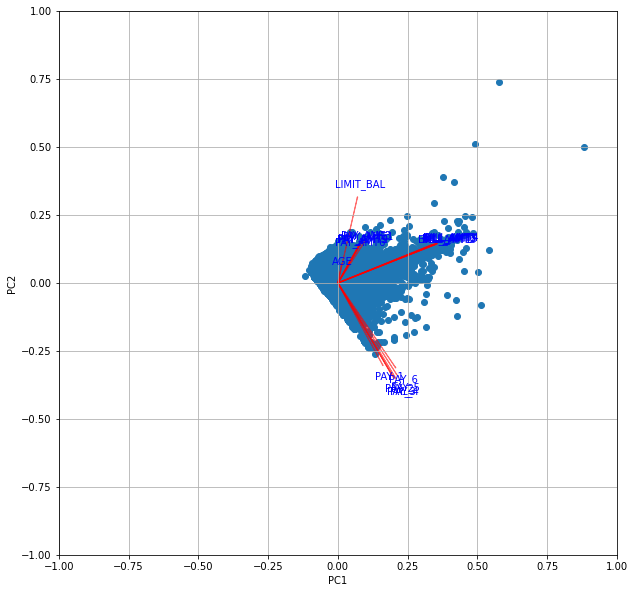

In [ ]:
def biplot(score,coeff,pcax,pcay,labels=None):
  plt.figure(figsize=(10,10))

  pca1=pcax-1
  pca2=pcay-1
  xs = score.iloc[:,pca1]
  ys = score.iloc[:,pca2]
  n=coeff.shape[0]
  scalex = 1.0/(xs.max()- xs.min())
  scaley = 1.0/(ys.max()- ys.min())
  plt.scatter(xs*scalex,ys*scaley)
  for i in range(n):
    plt.arrow(0, 0, coeff[i,pca1], coeff[i,pca2],color='r',alpha=0.5)
    if labels is None:
      plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, "Var"+str(i+1), color='b', ha='center', va='center')
    else:
      plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, labels[i], color='b', ha='center', va='center')
  plt.xlim(-1,1) # 범위는 최대 1에서 최소 -1
  plt.ylim(-1,1)
  plt.xlabel("PC{}".format(pcax))
  plt.ylabel("PC{}".format(pcay))
  plt.grid()

biplot(X_pp, pca.components_.T, 1, 2, labels=x_features.columns)


 ### Biplot 해석


1.   각 PC축에 가깝게 평행을 이루는 변수가 해당 PC에 영향을 가장 많이 주는 변수이다.

* PC1에 영향을 가장 많이 주는 변수는 BILL_AMT 변수이다. 
* PC2에 영향을 가장 많이 주는 변수는 LIMIT_BAL 변수이다.

2.   각 빨간선이 가까울수록 서로 상관관계가 있다.

* AGE 변수와 PAY_AMT 변수가 서로 상관관계가 있음을 알 수 있다. 
* PAY , PAY_AMT , BILL_AMT 각 변수끼리는 상관관계가 높음을 알 수 있다. 



# Factor Analysis

## 요인 분석 전 검정

**전제조건**

1.변수가 등간척도/비율척도로 측정한 양적변수인가?

-SEX, MARRIAGE, EDUCATION의 경우 등간척도/비율척도로 측정한 양적변수가 되지 못하기때문에 요인분석 진행전에 데이터에서 제외시켰다.

In [ ]:
data_scale

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-1.136720,-1.246020,1.794564,1.782348,-0.696663,-0.666599,-1.530046,-1.486041,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382
1,-0.365981,-1.029047,-0.874991,1.782348,0.138865,0.188746,0.234917,1.992316,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878
2,-0.597202,-0.161156,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122
3,-0.905498,0.164303,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130
4,-0.905498,2.334029,-0.874991,0.111736,-0.696663,0.188746,0.234917,0.253137,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.404759,0.381275,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,1.870379,2.018136,2.326690,0.695474,-0.149259,-0.384392,0.171250,0.611048,-0.012648,-0.113564,0.013131,-0.237130
29996,-0.134759,0.815221,-0.874991,-0.723570,-0.696663,-0.666599,0.234917,0.253137,-0.672786,-0.665299,-0.627430,-0.532924,-0.577691,-0.652724,-0.231032,-0.103955,0.214255,-0.299828,-0.314136,-0.293382
29997,-1.059646,0.164303,3.574267,2.617654,1.809921,-0.666599,0.234917,0.253137,-0.647227,-0.643830,-0.638158,-0.347961,-0.324517,-0.327687,-0.341942,-0.256990,0.952725,-0.039964,-0.183229,-0.119001
29998,-0.674276,0.598248,0.904712,-0.723570,0.138865,0.188746,0.234917,-0.616452,-0.717982,0.410269,0.422373,0.147844,-0.468063,0.169130,4.844316,-0.109033,-0.229895,-0.185120,3.152536,-0.191904


2.관찰치가 정규분포이며 상호 독립이고, 변수별 분산이 동일한가?

-데이터셋 설명 및 전처리 단계에서 StandardScaler를 통하여 z-standardization 하였기 때문에 조건을 만족한다 

3.모상관 행렬이 단위 행렬이라는 가설이 기각되었는가?(Bartlett Test, KMO TEST로 검정)

-Bartlett Test


카이제곱 분포를 이용해 요인분석 모형의 적합성검정,

귀무가설이 기각되어야 (p-value <= 0.05) 요인분석 모델 사용가능 (H0: 상관관계 행렬이 단위행렬이다)

In [ ]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(data_scale)
chi_square_value, p_value 

(560956.0325475953, 0.0)

p-value < 0.05 --> 귀무가설 기각 

-KMO Test

변수들간 상관관계가 다른 변수에 의해 잘 설명되는 정도를 나타내는 값

일반적으로 0.9 이상이면 아주 좋음, 0.8 이상이면 꽤 좋음, 0.7 이상이면 적당함, 0.6 이상이면 평범함, 0.5 미만이면 안 좋음

In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(data_scale)
kmo_model

/usr/local/lib/python3.7/dist-packages/factor_analyzer/utils.py:249: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


0.8036596824186575

약 0.8이므로 변수들간 상관관계가 다른 변수에 의해 꽤 좋게 설명된다고 할 수 있다.

4.변수 간 일정 수준 이상의 상관관계가 존재하는가?

변수들간 공분산을 통해 확인한다 

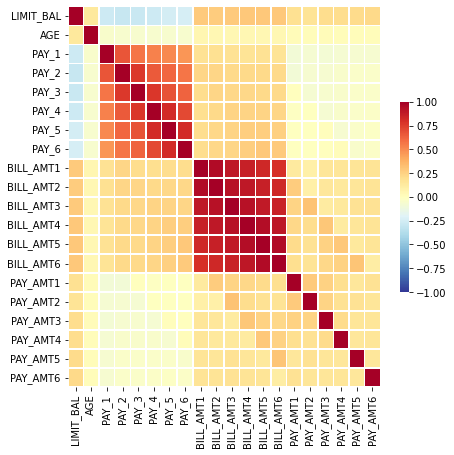

In [ ]:
ig, ax = plt.subplots( figsize=(7,7) )
sns.heatmap(data_scale.corr(), 
            cmap = 'RdYlBu_r', 
            # annot = True,   # 실제 값을 표시한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()


Heatmap에서 알 수 있듯이 변수들끼리 적게는 0.25 높게는 0.75 이상의 공분산을 가지므로

변수 간 일정수준 이상의 상관관계가 존재한다고 할 수 있다.

##Factor 개수 선택

적합한 요인개수를 찾는 PCA과정과 동일하게 FA의 경우에도 Factor 수 결정을 위해 방안1(Eigen Value이용)과

방안2(Scree plot 이용) 방안3(누적분산설명)을 이용한다

PCA에서 PC개수 선택근거와 동일하게 방안1을 선택, Factor의 개수는 4개로 결정한다 

##Rotation

각 요인에 변수들이 할당되어 해석되는 구조를 위해 회전(rotation)을 진행



-Varimax rotation

In [ ]:
fa = FactorAnalyzer(n_factors=4, rotation = "varimax")
fa.fit(data_scale)

FactorAnalyzer(n_factors=4, rotation='varimax', rotation_kwargs={})

In [ ]:
fa_result_loading = pd.DataFrame(fa.loadings_, 
                                 columns = ['Factor1', 'Factor2', 'Factor3', 'Factor4',],
                                 index=data_scale.columns)
fa_result_loading

,Factor1,Factor2,Factor3,Factor4
LIMIT_BAL,0.275008,-0.357703,0.374563,-0.041990
AGE,0.059733,-0.076423,0.053712,0.001666
PAY_1,0.141299,0.640330,-0.136968,0.243315
PAY_2,0.151852,0.816748,-0.087516,0.394933
PAY_3,0.138995,0.834677,-0.056104,0.149157
PAY_4,0.140367,0.862582,-0.037957,-0.101954
PAY_5,0.148186,0.877662,-0.017197,-0.318286
PAY_6,0.162392,0.791960,-0.004290,-0.260916
BILL_AMT1,0.918567,0.094553,0.131265,0.084173
BILL_AMT2,0.934034,0.117225,0.173412,0.067611


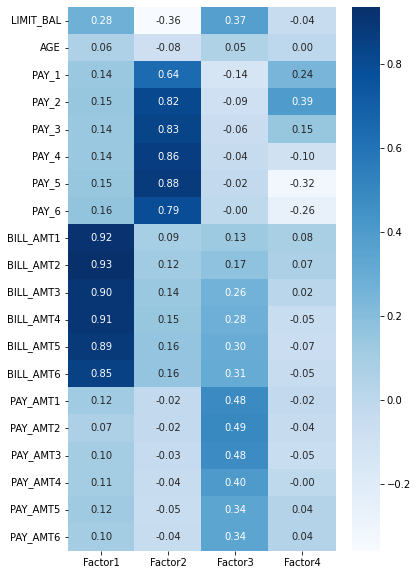

In [ ]:
# 시각화
plt.figure(figsize=(6,10))
sns.heatmap(fa_result_loading, cmap="Blues", annot=True, fmt='.2f')

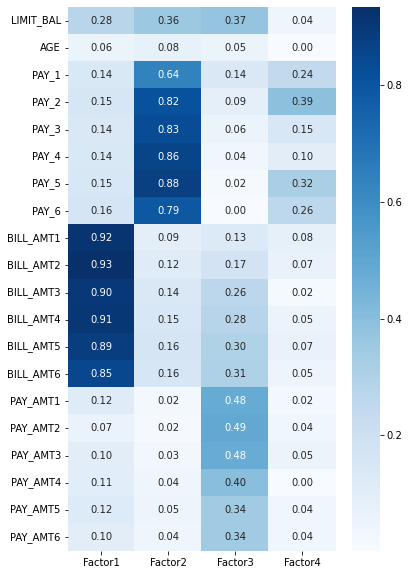

In [ ]:
# 절댓값을 이용한 시각화
plt.figure(figsize=(6,10))
sns.heatmap(np.abs(fa_result_loading), cmap="Blues", annot=True, fmt='.2f')

heat map을 보면Factor4는 변수에 대해 높은 적재량을 가진 값이 거의 없고

PAY_2변수에 대해서만 어느 정도의 적재량을 가지고 있지만

Factor2가 이미 PAY_2 변수를 훨씬 더 높은 적재량을 가지고있기때문에 고려하지 않는다.

따라서 3가지 요인을 최종 선택한다

In [ ]:
# 최종 요인 3개 선택
fa = FactorAnalyzer(n_factors=3, rotation = "varimax")
fa.fit(data_scale)

FactorAnalyzer(rotation='varimax', rotation_kwargs={})

In [ ]:
fa_result_loading_final = pd.DataFrame(fa.loadings_, 
                                       columns = ['Factor1', 'Factor2', 'Factor3',],
                                       index=data_scale.columns)
fa_result_loading_final

,Factor1,Factor2,Factor3
LIMIT_BAL,0.278544,-0.357026,0.379525
AGE,0.061316,-0.076505,0.053005
PAY_1,0.147285,0.633501,-0.176674
PAY_2,0.167018,0.777843,-0.151339
PAY_3,0.135382,0.836627,-0.083093
PAY_4,0.114432,0.878759,-0.012019
PAY_5,0.115247,0.867942,0.036388
PAY_6,0.130418,0.794558,0.045044
BILL_AMT1,0.921918,0.108666,0.122195
BILL_AMT2,0.935628,0.132282,0.167272


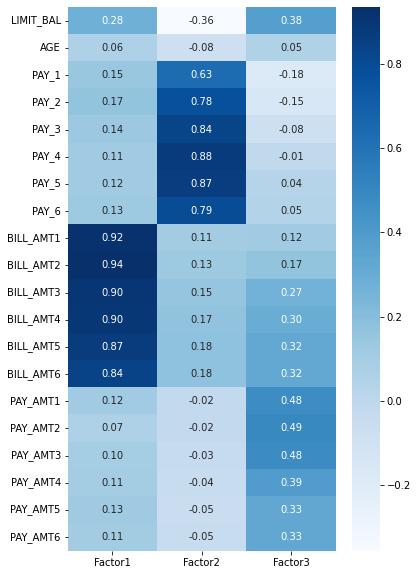

In [ ]:
# 시각화
plt.figure(figsize=(6,10))
sns.heatmap(fa_result_loading_final, cmap="Blues", annot=True, fmt='.2f')

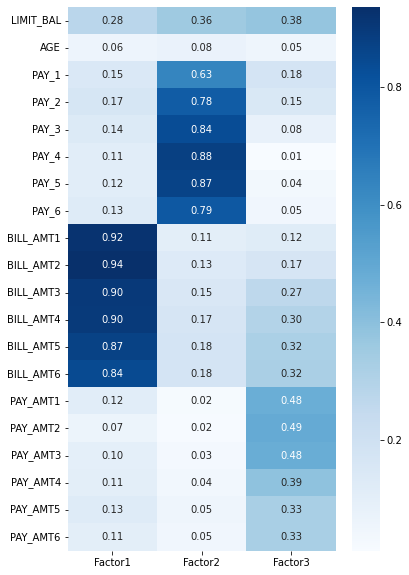

In [ ]:
# 절댓값으로 시각화
plt.figure(figsize=(6,10))
sns.heatmap(np.abs(fa_result_loading_final), cmap="Blues", annot=True, fmt='.2f')

-Oblimax rotation

In [ ]:
famax = FactorAnalyzer(n_factors=4, rotation = "oblimax")
famax.fit(data_scale)

FactorAnalyzer(n_factors=4, rotation='oblimax', rotation_kwargs={})

In [ ]:
famax_result_loading = pd.DataFrame(famax.loadings_, 
                                 columns = ['Factor1', 'Factor2', 'Factor3', 'Factor4',],
                                 index=data_scale.columns)
famax_result_loading

,Factor1,Factor2,Factor3,Factor4
LIMIT_BAL,0.162052,-0.547516,0.139805,0.007872
AGE,0.028536,-0.106918,0.004327,0.005659
PAY_1,0.383286,0.553952,-0.087424,0.215723
PAY_2,0.487519,0.685082,-0.047624,0.380114
PAY_3,0.494001,0.686780,0.051171,0.151917
PAY_4,0.513713,0.696912,0.136715,-0.085480
PAY_5,0.533425,0.693683,0.210114,-0.289766
PAY_6,0.508383,0.612097,0.181173,-0.236067
BILL_AMT1,0.853120,-0.293601,-0.249071,0.031133
BILL_AMT2,0.887877,-0.296432,-0.209769,0.024566


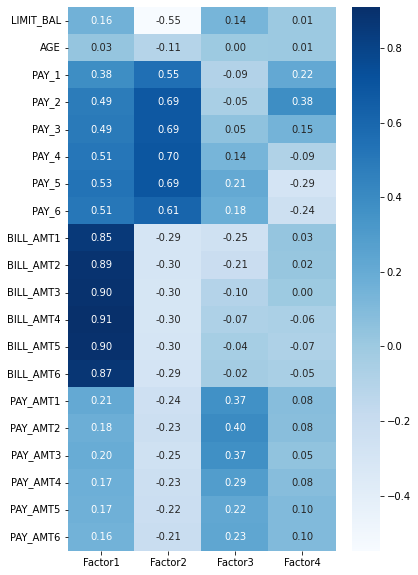

In [ ]:
# 시각화(절댓값 시각화는 Varimax rotation에서 시행했으므로 생략한다.)
plt.figure(figsize=(6,10))
sns.heatmap(famax_result_loading, cmap="Blues", annot=True, fmt='.2f')

Varimax rotation과 동일한 근거로 Factor 4를 제외한 3가지 요인을 최종요인으로 결정한다 

In [ ]:
# 최종 요인 3개 선택
famax = FactorAnalyzer(n_factors=3, rotation = "oblimax")
famax.fit(data_scale)

FactorAnalyzer(rotation='oblimax', rotation_kwargs={})

In [ ]:
famax_result_loading_final = pd.DataFrame(famax.loadings_, 
                                       columns = ['Factor1', 'Factor2', 'Factor3',],
                                       index=data_scale.columns)
famax_result_loading_final

,Factor1,Factor2,Factor3
LIMIT_BAL,0.166858,-0.549821,0.137654
AGE,0.029438,-0.107428,0.003868
PAY_1,0.375945,0.554668,-0.072387
PAY_2,0.467813,0.660565,-0.025357
PAY_3,0.487712,0.695384,0.061277
PAY_4,0.509429,0.711142,0.142182
PAY_5,0.518109,0.682903,0.182033
PAY_6,0.498352,0.611745,0.166656
BILL_AMT1,0.856802,-0.283308,-0.249599
BILL_AMT2,0.891712,-0.285570,-0.210182


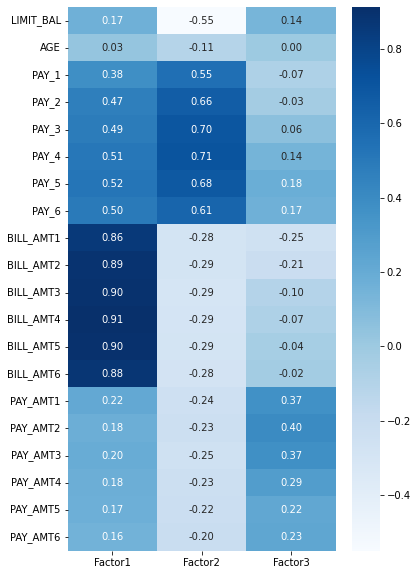

In [ ]:
# 시각화
plt.figure(figsize=(6,10))
sns.heatmap(famax_result_loading_final, cmap="Blues", annot=True, fmt='.2f')

-Promax rotation

In [ ]:
fap = FactorAnalyzer(n_factors=4, rotation = "promax")
fap.fit(data_scale)

FactorAnalyzer(n_factors=4, rotation_kwargs={})

In [ ]:
fap_result_loading = pd.DataFrame(fap.loadings_, 
                                 columns = ['Factor1', 'Factor2', 'Factor3', 'Factor4',],
                                 index=data_scale.columns)
fap_result_loading

,Factor1,Factor2,Factor3,Factor4
LIMIT_BAL,0.239992,-0.338871,0.257643,-0.060365
AGE,0.060509,-0.077638,0.025937,-0.002930
PAY_1,0.106491,0.609157,-0.030503,0.288791
PAY_2,0.064304,0.788980,0.094725,0.458699
PAY_3,0.060067,0.831439,0.083776,0.209156
PAY_4,0.076243,0.880750,0.052487,-0.045845
PAY_5,0.097273,0.913991,0.027279,-0.266108
PAY_6,0.114704,0.821406,0.033101,-0.213236
BILL_AMT1,1.003563,0.006040,-0.154585,0.082398
BILL_AMT2,1.005657,0.035954,-0.109736,0.068278


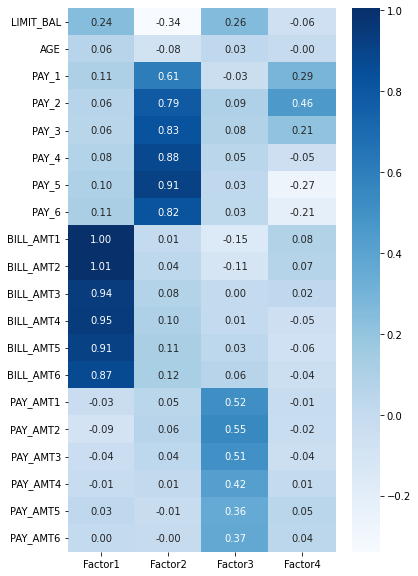

In [ ]:
# 시각화(절댓값 시각화는 Varimax rotation에서 시행했으므로 생략한다.)
plt.figure(figsize=(6,10))
sns.heatmap(fap_result_loading, cmap="Blues", annot=True, fmt='.2f')

Varimax rotation과 동일한 근거로 Factor 4를 제외한 3가지 요인을 최종요인으로 결정한다 

In [ ]:
# 최종 요인 3개 선택
fap = FactorAnalyzer(n_factors=3, rotation = "promax")
fap.fit(data_scale)

FactorAnalyzer(rotation_kwargs={})

In [ ]:
fap_result_loading_final = pd.DataFrame(fap.loadings_, 
                                       columns = ['Factor1', 'Factor2', 'Factor3',],
                                       index=data_scale.columns)
fap_result_loading_final

,Factor1,Factor2,Factor3
LIMIT_BAL,0.237569,-0.342623,0.272911
AGE,0.062488,-0.078794,0.024455
PAY_1,0.154524,0.611516,-0.139779
PAY_2,0.151218,0.764660,-0.089038
PAY_3,0.083925,0.842944,0.014909
PAY_4,0.030119,0.902854,0.114905
PAY_5,0.015826,0.900224,0.169589
PAY_6,0.039446,0.822873,0.159709
BILL_AMT1,1.016987,0.011261,-0.181720
BILL_AMT2,1.014632,0.042349,-0.129075


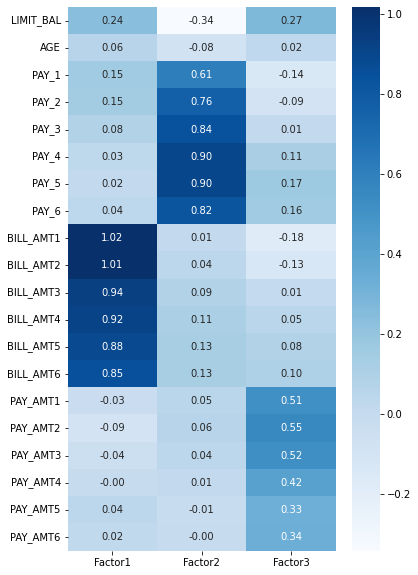

In [ ]:
# 시각화
plt.figure(figsize=(6,10))
sns.heatmap(fap_result_loading_final, cmap="Blues", annot=True, fmt='.2f')

-Oblimin rotation

In [ ]:
famin = FactorAnalyzer(n_factors=4, rotation = "oblimin")
famin.fit(data_scale)

FactorAnalyzer(n_factors=4, rotation='oblimin', rotation_kwargs={})

In [ ]:
famin_result_loading = pd.DataFrame(famin.loadings_, 
                                 columns = ['Factor1', 'Factor2', 'Factor3', 'Factor4',],
                                 index=data_scale.columns)
famin_result_loading

,Factor1,Factor2,Factor3,Factor4
LIMIT_BAL,0.294867,-0.211027,-0.203483,0.283163
AGE,0.069476,-0.056534,-0.034447,0.033009
PAY_1,0.057605,0.081476,0.622379,-0.075768
PAY_2,0.018562,-0.012199,0.932450,0.023469
PAY_3,0.004499,0.314962,0.611412,0.020002
PAY_4,0.007707,0.655648,0.283551,-0.002190
PAY_5,0.018474,0.942898,-0.003405,-0.018659
PAY_6,0.045222,0.814383,0.031651,-0.008263
BILL_AMT1,0.980537,-0.106929,0.069443,-0.103104
BILL_AMT2,0.984985,-0.076172,0.065200,-0.061447


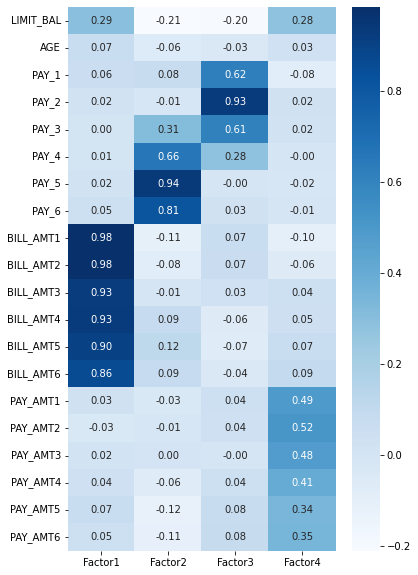

In [ ]:
# 시각화(절댓값 시각화는 Varimax rotation에서 시행했으므로 생략한다.)
plt.figure(figsize=(6,10))
sns.heatmap(famin_result_loading, cmap="Blues", annot=True, fmt='.2f')

heat map을 보면 다른 Rotation과 다르게 4가지 요인 모두 높은 적재량을 보이는 변수들이 있다 

따라서 4가지 요인을 최종 선택한다

In [ ]:
# 최종 요인 4개 선택
famin = FactorAnalyzer(n_factors=4, rotation = "oblimin")
famin.fit(data_scale)

FactorAnalyzer(n_factors=4, rotation='oblimin', rotation_kwargs={})

In [ ]:
famin_result_loading_final = pd.DataFrame(famin.loadings_, 
                                       columns = ['Factor1', 'Factor2', 'Factor3','Factor4'],
                                       index=data_scale.columns)
famin_result_loading_final

,Factor1,Factor2,Factor3,Factor4
LIMIT_BAL,0.294867,-0.211027,-0.203483,0.283163
AGE,0.069476,-0.056534,-0.034447,0.033009
PAY_1,0.057605,0.081476,0.622379,-0.075768
PAY_2,0.018562,-0.012199,0.932450,0.023469
PAY_3,0.004499,0.314962,0.611412,0.020002
PAY_4,0.007707,0.655648,0.283551,-0.002190
PAY_5,0.018474,0.942898,-0.003405,-0.018659
PAY_6,0.045222,0.814383,0.031651,-0.008263
BILL_AMT1,0.980537,-0.106929,0.069443,-0.103104
BILL_AMT2,0.984985,-0.076172,0.065200,-0.061447


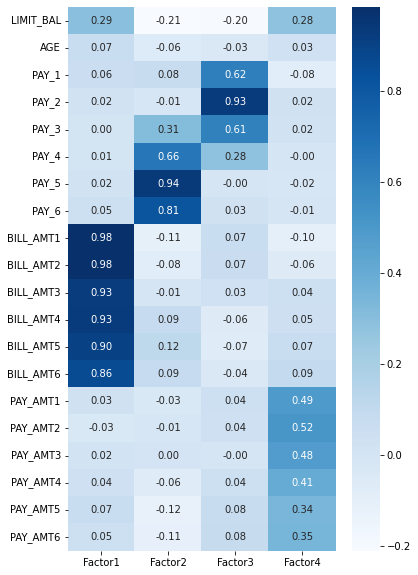

In [ ]:
# 시각화
plt.figure(figsize=(6,10))
sns.heatmap(famin_result_loading_final, cmap="Blues", annot=True, fmt='.2f')

#Results


-Varimax Rotation 

In [ ]:
fa.get_factor_variance() # 각 factor의 variance
fa_result_fromLoading = pd.DataFrame(fa.get_factor_variance(), columns = ['Factor1', 'Factor2', 'Factor3',])
fa_result_fromLoading.index = ['SS Loadings', 'Proportion Var', 'Cumulative Var']
fa_result_fromLoading

,Factor1,Factor2,Factor3
SS Loadings,5.074706,4.148379,1.689959
Proportion Var,0.253735,0.207419,0.084498
Cumulative Var,0.253735,0.461154,0.545652


Varimax rotation에서 3개의 Factor로 설명가능한 분산은 약 54퍼센트이다.

-Oblimax Rotation 

In [ ]:
famax.get_factor_variance() # 각 factor의 variance
famax_result_fromLoading = pd.DataFrame(famax.get_factor_variance(), columns = ['Factor1', 'Factor2', 'Factor3',])
famax_result_fromLoading.index = ['SS Loadings', 'Proportion Var', 'Cumulative Var']
famax_result_fromLoading

,Factor1,Factor2,Factor3
SS Loadings,6.360653,3.692555,0.859835
Proportion Var,0.318033,0.184628,0.042992
Cumulative Var,0.318033,0.502660,0.545652


Obimax rotation에서 3개의 Factor로 설명가능한 분산은 약 54퍼센트이다.

-Promax Rotation 

In [ ]:
fap.get_factor_variance() # 각 factor의 variance
fap_result_fromLoading = pd.DataFrame(fap.get_factor_variance(), columns = ['Factor1', 'Factor2', 'Factor3',])
fap_result_fromLoading.index = ['SS Loadings', 'Proportion Var', 'Cumulative Var']
fap_result_fromLoading

,Factor1,Factor2,Factor3
SS Loadings,5.420917,4.157707,1.473683
Proportion Var,0.271046,0.207885,0.073684
Cumulative Var,0.271046,0.478931,0.552615


Promax rotation에서 3개의 Factor로 설명가능한 분산은 약 55퍼센트이다.

-Oblimin Rotation 

In [ ]:
famin.get_factor_variance() # 각 factor의 variance
famin_result_fromLoading = pd.DataFrame(famin.get_factor_variance(), columns = ['Factor1', 'Factor2', 'Factor3','Factor4'])
famin_result_fromLoading.index = ['SS Loadings', 'Proportion Var', 'Cumulative Var']
famin_result_fromLoading

,Factor1,Factor2,Factor3,Factor4
SS Loadings,5.322856,2.214798,1.792869,1.267052
Proportion Var,0.266143,0.110740,0.089643,0.063353
Cumulative Var,0.266143,0.376883,0.466526,0.529879


Oblimin rotation에서 4개의 Factor로 설명가능한 분산은 약 53퍼센트이다.

#Factor 네이밍 및 FA결과해석

먼저 동일한 변수들에 대하여 유사한 적재량을 가지고 3개의 동일한 factor수를 가지는  Varimax rotation,Oblimax rotation, Promax rotation 과 

4개의 factor수를 가지는Oblimin rotation 두 가지 경우로 나눈다 .

##3개의 Factor 수: Varimax rotation,Oblimax rotation, Promax rotation

Factor1은 Bill_AMT 데이터들이 모두 높은 적재량을 보인다.

즉,Factor1은 월별로 나눠져있던 청구명세서 액수를 대표하는 종합적인 '청구명세서 액수' 요인이라고 해석할 수 있다. 

Factor2는 PAY_ 데이터들이 높은 적재량을 보인다.

즉,Factor2는 월별로 나눠져있던 상환 상황을 대표하는 종합적인 '상환상황' (밀린 달의 수) 요인이라고 해석할 수 있다.

 
Factor3는 PAY_AMT  데이터들이 높은 적재량을 보인다.

즉,Factor3는 월별로 나눠져있던 이전지불 금액을 대표하는 종합적인 '이전지불 금액' 요인이라고 해석할 수 있다.




**Factor Naming**


Factor1:Bill_Statement_Amount(청구명세서 액수)


Factor2:Repayment_Status (상환상황)


Factor3:Previous_Payment_Amount(이전 지불금액)

In [ ]:
# Varimax rotation을 이용한 Factor Analysis가 적용된 dataset (scaled)
X_f = fa.fit_transform(data_scale)
X_ff = pd.DataFrame(X_f[:,:3], 
                    columns = ['Bill_Statement_Amount','Repayment_Status','Previous_Payment_Amount',], 
                    index = data_scale.index)
X_ff

,Bill_Statement_Amount,Repayment_Status,Previous_Payment_Amount
0,-0.346954,-0.387533,-1.072572
1,-0.730764,0.742282,-0.267094
2,-0.454952,0.253655,-0.292971
3,-0.069136,0.220030,-0.361625
4,-0.580102,0.080979,0.423451
...,...,...,...
29995,1.337988,-0.065845,-0.300959
29996,-0.633429,-0.334475,0.030633
29997,-0.532366,1.141759,-0.569893
29998,-0.409878,0.156436,1.483846


In [ ]:
# Oblimax rotation을 이용한 Factor Analysis가 적용된 dataset (scaled)
X_fmax = famax.fit_transform(data_scale)
X_ffmax = pd.DataFrame(X_fmax[:,:3], 
                    columns = ['Bill_Statement_Amount','Repayment_Status','Previous_Payment_Amount',], 
                    index = data_scale.index)
X_ffmax

,Bill_Statement_Amount,Repayment_Status,Previous_Payment_Amount
0,-0.765312,0.209517,-0.889590
1,-0.332350,0.994945,0.236568
2,-0.340161,0.491228,-0.011838
3,-0.051608,0.351805,-0.239866
4,-0.332577,0.111458,0.631946
...,...,...,...
29995,1.007714,-0.415988,-0.834620
29996,-0.680856,-0.070664,0.213275
29997,-0.058819,1.381262,-0.021444
29998,0.133382,-0.295764,1.512945


In [ ]:
# Promax rotation을 이용한 Factor Analysis가 적용된 dataset (scaled)
X_fp = fap.fit_transform(data_scale)
X_ffp = pd.DataFrame(X_fp[:,:3], 
                    columns = ['Bill_Statement_Amount','Repayment_Status','Previous_Payment_Amount',], 
                    index = data_scale.index)
X_ffp

,Bill_Statement_Amount,Repayment_Status,Previous_Payment_Amount
0,-0.672474,-0.248822,-1.065711
1,-0.721144,0.727167,-0.547677
2,-0.501100,0.265141,-0.434524
3,-0.155705,0.265370,-0.392607
4,-0.423507,-0.016593,0.238691
...,...,...,...
29995,1.183108,0.060021,0.078673
29996,-0.619290,-0.373365,-0.095985
29997,-0.591542,1.177563,-0.836249
29998,0.054277,-0.084994,1.286576


##4개의 Factor수: Oblimin rotation

Factor1은 Bill_AMT 데이터들이 모두 높은 적재량을 보인다.

즉,Factor1은 월별로 나눠져있던 청구명세서 액수를 대표하는 종합적인 '청구명세서 액수' 요인이라고 해석할 수 있다. 

Factor2는 PAY_4(6월),PAY_5(5월),PAY_6(4월)데이터들이 높은 적재량을 보인다.

즉,Factor2는 월별로 나눠져있던 상환상황 중 2분기 상환상황을 대표을 하는 '2분기 상환상황' 요인 이라고 해석할 수 있다.


Factor3는 PAY_1(9월),PAY_2(8월),PAY_3(7월)데이터들이 높은 적재량을 보인다.

즉,Factor2는 월별로 나눠져있던 상환 상황 중 3분기 상환상황 하는 '3분기 상환상황' 요인 이라고 해석할 수 있다.
 
Factor4는 PAY_AMT  데이터들이 높은 적재량을 보인다.

즉,Factor3는 월별로 나눠져있던 이전지불 금액을 대표하는 종합적인 '이전지불 금액' 요인이라고 해석할 수 있다.

**Factor Naming**


Factor1:Bill_Statement_Amount(청구명세서 액수)


Factor2:Repayment_Status_2Q (2분기 상환상황)

Factor2:Repayment_Status_3Q (3분기 상환상황)

Factor3:Previous_Payment_Amount(이전 지불금액)

In [ ]:
# Oblimin rotation을 이용한 Factor Analysis가 적용된 dataset (scaled)
X_fmin = famin.fit_transform(data_scale)
X_ffmin = pd.DataFrame(X_fmin[:,:4], 
                    columns = ['Bill_Statement_Amount','Repayment_Status_2Q','Repayment_Status_3Q','Previous_Payment_Amount',], 
                    index = data_scale.index)
X_ffmin

,Bill_Statement_Amount,Repayment_Status_2Q,Repayment_Status_3Q,Previous_Payment_Amount
0,-0.674455,-1.326896,1.128913,-0.979846
1,-0.652504,0.487731,1.073160,-0.451281
2,-0.470195,0.228316,0.140333,-0.389935
3,-0.127079,0.216830,0.198722,-0.382799
4,-0.430357,0.177147,-0.150079,0.270899
...,...,...,...,...
29995,1.167692,-0.055224,0.397629,0.003325
29996,-0.637236,0.013580,-0.783042,-0.104920
29997,-0.513180,0.314285,2.198952,-0.558177
29998,-0.006575,0.157922,-0.257486,1.416410


#Plot

Score Plot을 통해 FA 결과를 좀 더 분석하고자 한다.

4개의 Rotation중 3개의 Rotation이 3개의 Factor들로 구성되므로 

3개의 Factor를 가지는 Rotation중 1개인 Varimax Rotation의 plot을 보고자 한다.

채무불이행자: 노란색, 채무이행자: 보라색

(-5.0, 10.0)

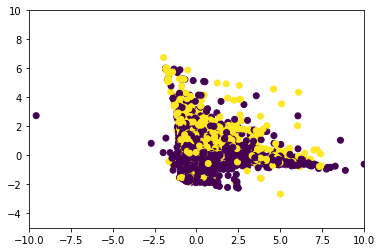

In [ ]:
# Factor1과 Factor의 Score plot
plt.scatter(x=X_ff['Bill_Statement_Amount'],y=X_ff['Repayment_Status'], c=y_target)
plt.xlim(-10,10)
plt.ylim(-5,10)

Factor1:Bill_Statement_Amount(청구명세서 액수)


Factor2:Repayment_Status(상환상황, 밀린 달의 수)

Factor1과 Factor2의 특성상 양수쪽으로 조금 더 길어질 수 밖에 없다 이를 고려하면  (0,0)을 중심으로 잘 표현되었다고 할 수 있다 

노란색점과 보라색점 모두 Factor1이 커질경우 Factor2는 작아진다 .

이는 Credit Default의 유무와 관계없이 청구명세서 액수금액이 커지면 상환을 오히려 빨리한다고 해석할 수 있다 .


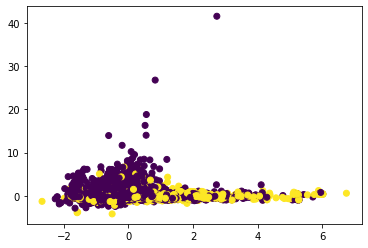

In [ ]:
# Factor2와 Facto3r의 Score plot
plt.scatter(x=X_ff['Repayment_Status'],y=X_ff['Previous_Payment_Amount'], c=y_target)


Factor2:Repayment_Status (상환상황, 밀린 달의 수)

Factor3:Previous_Payment_Amount(이전 지불금액)

Factor2와 Factor3의 특성상 양수쪽으로 조금 더 길어질 수 밖에 없다 이를 고려하면 (0,0)을 중심으로 잘 표현되었다고 할 수 있다 

(보라색)채무이행자의 경우 밀린달의 수가 적고 전에 낸 지불 금액이 많으며 (노란색)채무불이행자의 경우 밀린달의 수가 많고 전에 낸 지불 금액이 전체적으로 적은 것으로 보인다. 




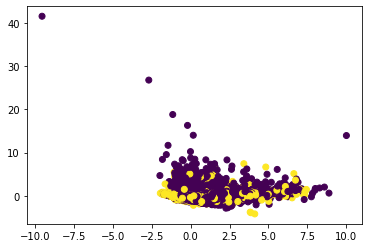

In [ ]:
# Factor1과 Factor3의 Score plot
plt.scatter(x=X_ff['Bill_Statement_Amount'],y=X_ff['Previous_Payment_Amount'], c=y_target)


Factor1:Bill_Statement_Amount(청구명세서 액수)

Factor3:Previous_Payment_Amount(이전 지불금액)

Factor1와 Factor3의 특성상 양수쪽으로 조금 더 길어질 수 밖에 없다 이를 고려하면 (0,0)을 중심으로 잘 표현되었다고 할 수 있다 

노란색점(채무불이행)과 보라색(채무이행)점 모두 Factor들의 값이 변해도 무작위로 잘 분포가 되어있다. .

이는 Credit Default에 관계없이 청구명세서 액수와 이전 지불금액의 상관도가 낮다고 해석할 수 있다.

보라색(채무이행자)가 노란색점(채무불이행자)보다 전체적으로 이전 지불금액이 높은 경향이 있는 것을 확인 할 수 있다. 

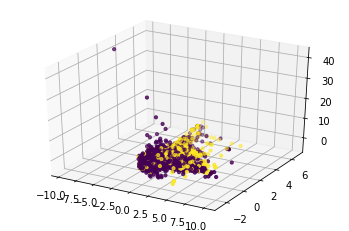

In [ ]:
# Factor1과 Factor2,Factor 3의 Score plot
fig = plt.figure()
ax = fig.gca(projection = '3d')

ax.scatter(X_ff['Bill_Statement_Amount'],X_ff['Repayment_Status'],X_ff['Previous_Payment_Amount'], s=10, c = y_target)
plt.show()

(Facotr1,Factor2,Factor3)의 데이터들이 (0,0,0)을 중심으로 어느정도 잘 표현되었기 때문에

FA분석이 적절히 진행되었다고 할 수 있다 

#종합적인 FA해석



4개의 Various한 rotation을 사용한 FA결과 본 논문에서 사용한 데이터들은
크게는 '청구명세서 액수', '싱환상황', '이전 지불금액' 의 

3가지 요인들로 구성되고 , 요인을 한개 늘려서 분석한다면

'청구명세서 액수', '2분기 상환상황','3분기 상환상황', '이전 지불금액' 의 조금 더 구체적인 4가지 요인으로 구성됨을 알 수 있었다.
 


추가적으로 Oblimin rotation을 사용한 FA와 나머지 비교를 통해 선택한 Rotation에 따라 Factor의 개수가 달라질 수 있음을 확인했다 

AGE(나이)변수와 LIMIT_BAL(신용한도)변수는 어떠한 Factor도 높은 적재량을 보이지 못했다.

이는 '청구명세서 액수','상환상황','이전 지불금액'등의 요인들이 AGE와 LIMIT_BAL과는 상관도가 낮다고 해석할 수 있다.
 
